# EDA of SPX Data

### Plan for EDA
Each section will compare overall vs put vs call
1. Describing the data
2. Correlation Analyses
3. Time Series Data
4. Greeks

The target variable to be predicted is `close`

Data used is option quotes from the last trading friday of 3 months (Jul 2024, Aug 2024, Sep 2024)
<br><br>
<i>Source: Chicago Board Options Exchange</i>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Describing the data

In [2]:
df1 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-07-26.csv')
df3 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-09-27.csv')
df2 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-08-30.csv')
df4 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-10-11.csv')
df5 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-10-18.csv')
df6 = pd.read_csv('../data/SPX/UnderlyingOptionsIntervals_3600sec_calcs_oi_2024-10-25.csv')

In [3]:
# Concatenating data to form a combined dataframe for put options
df_call = pd.concat([
    df1[(df1['option_type'] == 'C') & (df1['root'] == 'SPX')],
    df2[(df2['option_type'] == 'C') & (df2['root'] == 'SPX')],
    df3[(df3['option_type'] == 'C') & (df3['root'] == 'SPX')],
    df4[(df4['option_type'] == 'C') & (df4['root'] == 'SPX')],
    df5[(df5['option_type'] == 'C') & (df5['root'] == 'SPX')],
    df6[(df6['option_type'] == 'C') & (df6['root'] == 'SPX')]

], ignore_index=True)

print("Null Values:")
print(df_call.isnull().sum())

Null Values:
underlying_symbol           0
quote_datetime              0
root                        0
expiration                  0
strike                      0
option_type                 0
open                        0
high                        0
low                         0
close                       0
trade_volume                0
bid_size                    0
bid                         0
ask_size                    0
ask                         0
underlying_bid              0
underlying_ask              0
implied_underlying_price    0
active_underlying_price     0
implied_volatility          0
delta                       0
gamma                       0
theta                       0
vega                        0
rho                         0
open_interest               0
dtype: int64


In [4]:

df_put = pd.concat([
    df1[(df1['option_type'] == 'P') & (df1['root'] == 'SPX')],
    df2[(df2['option_type'] == 'P') & (df2['root'] == 'SPX')],
    df3[(df3['option_type'] == 'P') & (df3['root'] == 'SPX')], 
    df4[(df4['option_type'] == 'P') & (df4['root'] == 'SPX')],
    df5[(df5['option_type'] == 'P') & (df5['root'] == 'SPX')],
    df6[(df6['option_type'] == 'P') & (df6['root'] == 'SPX')]
    
], ignore_index=True)

print("Null Values:")
print(df_put.isnull().sum())

Null Values:
underlying_symbol           0
quote_datetime              0
root                        0
expiration                  0
strike                      0
option_type                 0
open                        0
high                        0
low                         0
close                       0
trade_volume                0
bid_size                    0
bid                         0
ask_size                    0
ask                         0
underlying_bid              0
underlying_ask              0
implied_underlying_price    0
active_underlying_price     0
implied_volatility          0
delta                       0
gamma                       0
theta                       0
vega                        0
rho                         0
open_interest               0
dtype: int64


### Descriptive Statistics of call dataframe

In [5]:
df_call.describe(include='all')

underlying_symbol       quote_datetime    root  expiration  \
count             165858               165858  165858      165858   
unique                 1                   42       1          23   
top                 ^SPX  2024-10-11 10:30:00     SPX  2024-11-15   
freq              165858                 4037  165858       16604   
mean                 NaN                  NaN     NaN         NaN   
std                  NaN                  NaN     NaN         NaN   
min                  NaN                  NaN     NaN         NaN   
25%                  NaN                  NaN     NaN         NaN   
50%                  NaN                  NaN     NaN         NaN   
75%                  NaN                  NaN     NaN         NaN   
max                  NaN                  NaN     NaN         NaN   

               strike option_type           open           high  \
count   165858.000000      165858  165858.000000  165858.000000   
unique            NaN           1            NaN            NaN   
top               NaN           C            NaN            NaN   
freq              NaN      165858            NaN            NaN   
mean      4995.796615         NaN      13.434703      13.475374   
std       1613.127490         NaN     119.576061     119.645812   
min        200.000000         NaN       0.000000       0.000000   
25%       4150.000000         NaN       0.000000       0.000000   
50%       5150.000000         NaN       0.000000       0.000000   
75%       5850.000000         NaN       0.000000       0.000000   
max      12000.000000         NaN    5662.290000    5662.290000   

                  low          close  ...  underlying_ask  \
count   165858.000000  165858.000000  ...   165858.000000   
unique            NaN            NaN  ...             NaN   
top               NaN            NaN  ...             NaN   
freq              NaN            NaN  ...             NaN   
mean        13.410341      13.450615  ...     5728.493468   
std        119.515044     119.582342  ...      139.645157   
min          0.000000       0.000000  ...     5450.090000   
25%          0.000000       0.000000  ...     5607.470000   
50%          0.000000       0.000000  ...     5774.820000   
75%          0.000000       0.000000  ...     5844.750000   
max       5662.290000    5662.290000  ...     5894.690000   

        implied_underlying_price  active_underlying_price  implied_volatility  \
count                   165858.0            165858.000000       165858.000000   
unique                       NaN                      NaN                 NaN   
top                          NaN                      NaN                 NaN   
freq                         NaN                      NaN                 NaN   
mean                         0.0              5720.775821            0.285207   
std                          0.0               140.354203            0.292014   
min                          0.0              5448.565000            0.000000   
25%                          0.0              5606.305000            0.151400   
50%                          0.0              5760.520000            0.210800   
75%                          0.0              5823.335000            0.303600   
max                          0.0              5870.410000            8.380200   

                delta          gamma          theta           vega  \
count   165858.000000  165858.000000  165858.000000  165858.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.699203       0.000313      -0.332565       8.829345   
std          0.326607       0.000389       0.389600       8.807086   
min          0.000000       0.000000      -3.487500       0.000000   
25%          0.510200       0.000100      -0.507800       1.750375   
50%          0.841900       0.000200 

In [6]:
df_put.describe(include='all')

underlying_symbol       quote_datetime    root  expiration  \
count             165858               165858  165858      165858   
unique                 1                   42       1          23   
top                 ^SPX  2024-10-11 10:30:00     SPX  2024-11-15   
freq              165858                 4037  165858       16604   
mean                 NaN                  NaN     NaN         NaN   
std                  NaN                  NaN     NaN         NaN   
min                  NaN                  NaN     NaN         NaN   
25%                  NaN                  NaN     NaN         NaN   
50%                  NaN                  NaN     NaN         NaN   
75%                  NaN                  NaN     NaN         NaN   
max                  NaN                  NaN     NaN         NaN   

               strike option_type           open           high  \
count   165858.000000      165858  165858.000000  165858.000000   
unique            NaN           1            NaN            NaN   
top               NaN           P            NaN            NaN   
freq              NaN      165858            NaN            NaN   
mean      4995.796615         NaN       8.897947       8.925803   
std       1613.127490         NaN      58.296317      58.352184   
min        200.000000         NaN       0.000000       0.000000   
25%       4150.000000         NaN       0.000000       0.000000   
50%       5150.000000         NaN       0.000000       0.000000   
75%       5850.000000         NaN       0.000000       0.000000   
max      12000.000000         NaN    5650.460000    5651.970000   

                  low          close  ...  underlying_ask  \
count   165858.000000  165858.000000  ...   165858.000000   
unique            NaN            NaN  ...             NaN   
top               NaN            NaN  ...             NaN   
freq              NaN            NaN  ...             NaN   
mean         8.856156       8.883303  ...     5728.493468   
std         58.226857      58.281476  ...      139.645157   
min          0.000000       0.000000  ...     5450.090000   
25%          0.000000       0.000000  ...     5607.470000   
50%          0.000000       0.000000  ...     5774.820000   
75%          0.000000       0.000000  ...     5844.750000   
max       5649.790000    5651.970000  ...     5894.690000   

        implied_underlying_price  active_underlying_price  implied_volatility  \
count                   165858.0            165858.000000       165858.000000   
unique                       NaN                      NaN                 NaN   
top                          NaN                      NaN                 NaN   
freq                         NaN                      NaN                 NaN   
mean                         0.0              5720.775821            0.275124   
std                          0.0               140.354203            0.223577   
min                          0.0              5448.565000            0.000000   
25%                          0.0              5606.305000            0.155200   
50%                          0.0              5760.520000            0.214600   
75%                          0.0              5823.335000            0.306800   
max                          0.0              5870.410000            6.803700   

                delta          gamma          theta           vega  \
count   165858.000000  165858.000000  165858.000000  165858.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -0.297084       0.000316      -0.399436       8.917970   
std          0.320984       0.000388       0.344964       8.811353   
min         -1.000000       0.000000      -2.944900       0.000000   
25%         -0.479200       0.000100      -0.563200       1.887425   
50%         -0.157600       0.000200 

In [7]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165858 entries, 0 to 165857
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   underlying_symbol         165858 non-null  object 
 1   quote_datetime            165858 non-null  object 
 2   root                      165858 non-null  object 
 3   expiration                165858 non-null  object 
 4   strike                    165858 non-null  float64
 5   option_type               165858 non-null  object 
 6   open                      165858 non-null  float64
 7   high                      165858 non-null  float64
 8   low                       165858 non-null  float64
 9   close                     165858 non-null  float64
 10  trade_volume              165858 non-null  int64  
 11  bid_size                  165858 non-null  int64  
 12  bid                       165858 non-null  float64
 13  ask_size                  165858 non-null  i

In [8]:
df_put.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165858 entries, 0 to 165857
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   underlying_symbol         165858 non-null  object 
 1   quote_datetime            165858 non-null  object 
 2   root                      165858 non-null  object 
 3   expiration                165858 non-null  object 
 4   strike                    165858 non-null  float64
 5   option_type               165858 non-null  object 
 6   open                      165858 non-null  float64
 7   high                      165858 non-null  float64
 8   low                       165858 non-null  float64
 9   close                     165858 non-null  float64
 10  trade_volume              165858 non-null  int64  
 11  bid_size                  165858 non-null  int64  
 12  bid                       165858 non-null  float64
 13  ask_size                  165858 non-null  i

### Dropping unnecessary columns
`root`,`underlying_symbol`

In [9]:
df_call = df_call.drop(['root','underlying_symbol','implied_underlying_price'],axis=1)
df_put = df_put.drop(['root','underlying_symbol','implied_underlying_price'],axis=1)

### Converting relevant columns to datetime
`expiration` and `quotedate`

In [10]:
df_call['expiration'] = pd.to_datetime(df_call['expiration'])
df_call['quote_datetime'] = pd.to_datetime(df_call['quote_datetime'])

df_put['expiration'] = pd.to_datetime(df_put['expiration'])
df_put['quote_datetime'] = pd.to_datetime(df_put['quote_datetime'])


## Histograms of key features

### `Strike Price Distribution` <br>
Strike price is the price at which the option can be exercised. <br>

### Observations
* A wide distribution indicates a wide range of strike prices available to traders
* A negative concentration of strike prices indicates the market believes the asset price is likely to decrease

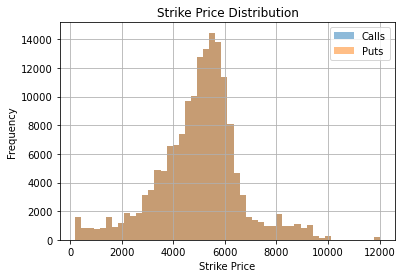

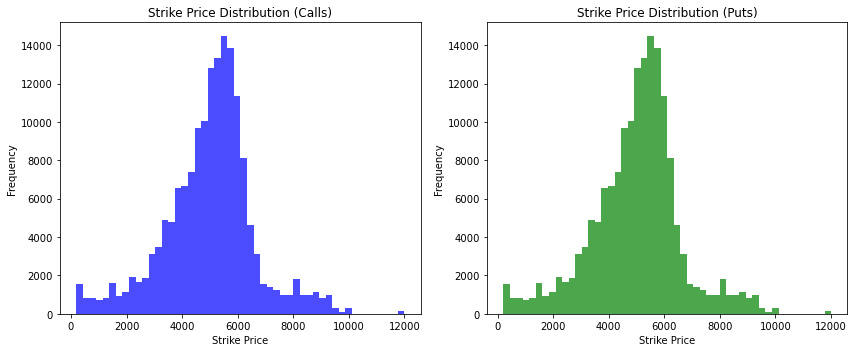

In [11]:
df_call['strike'].hist(bins=50, alpha=0.5, label='Calls')
df_put['strike'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Strike Price Distribution')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 

ax[0].hist(df_call['strike'], bins=50, alpha=0.7, color='blue', label='Calls')
ax[0].set_title('Strike Price Distribution (Calls)')
ax[0].set_xlabel('Strike Price')
ax[0].set_ylabel('Frequency')

ax[1].hist(df_put['strike'], bins=50, alpha=0.7, color='green', label='Puts')
ax[1].set_title('Strike Price Distribution (Puts)')
ax[1].set_xlabel('Strike Price')
ax[1].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()


### `Implied Volatility Distribution` <br>
Implied volatility reflects the market's expectation of future price volatility. <br>

### Observations
* Calls have a stronger positive skew, indicating some variation in perception of volatility of SPX calls, with significant outliers as some traders expect large upward movement of price and others expect more moderate movements
* Puts have a more concentrated IV distribution, this indicates higher uncertainty towards downwards price fluctuations

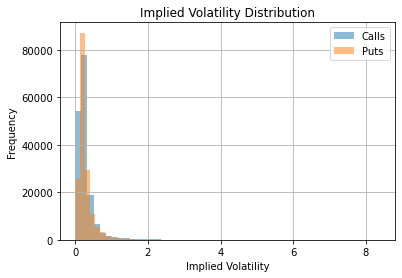

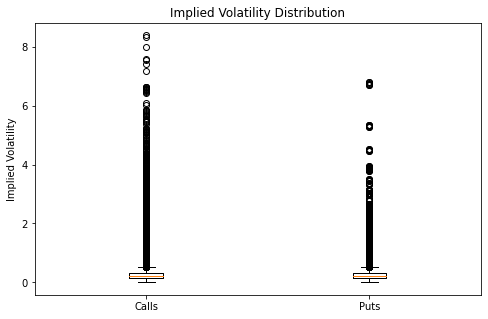

In [12]:
df_call['implied_volatility'].hist(bins=50, alpha=0.5, label='Calls')
df_put['implied_volatility'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Implied Volatility Distribution')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')
plt.show()


data = [df_call['implied_volatility'], df_put['implied_volatility']]

plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=['Calls', 'Puts'])

plt.title('Implied Volatility Distribution')
plt.ylabel('Implied Volatility')

plt.show()

### `Option Price Distribution` <br>
Option price is the range of prices at which the options are traded. <br>

### Observations
* Calls have a stronger positive skew, indicating traders are buying more low-priced call options, likely out of the money, and positioning for a positive upwards movement

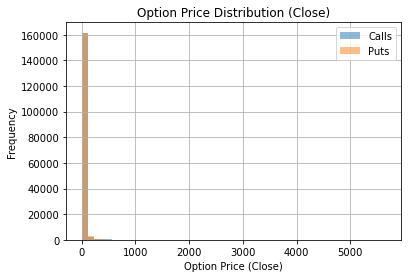

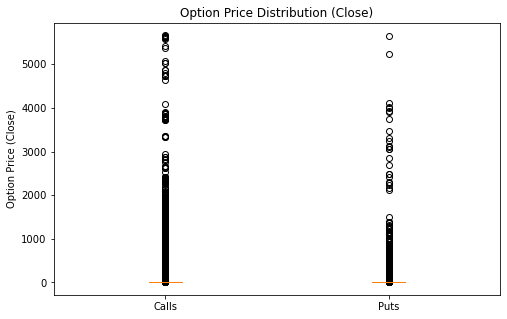

In [13]:
df_call['close'].hist(bins=50, alpha=0.5, label='Calls')
df_put['close'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Option Price Distribution (Close)')
plt.xlabel('Option Price (Close)')
plt.ylabel('Frequency')
plt.show()

data = [df_call['close'], df_put['close']]

plt.figure(figsize=(8, 5))
plt.boxplot(data, labels=['Calls', 'Puts'])

plt.title('Option Price Distribution (Close)')
plt.ylabel('Option Price (Close)')

plt.show()


### `Trade Volume Distribution` <br>
The amount of trading activity for different options, showing how many contracts are being traded. <br>

### Observations
* Calls have a weaker skew, indicating market sentiment is overall more stable, less speculative, less extreme bets

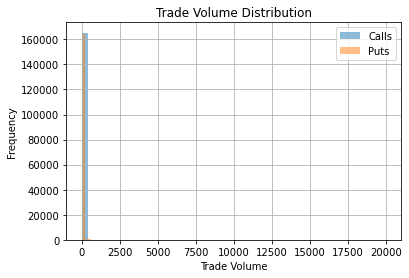

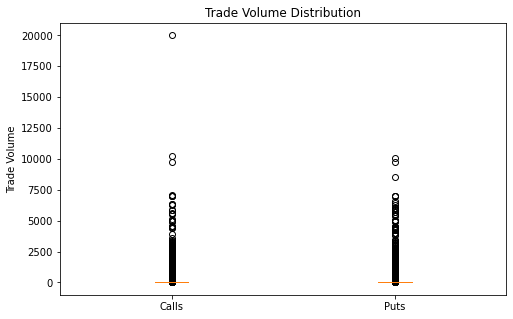

In [14]:
df_call['trade_volume'].hist(bins=50, alpha=0.5, label='Calls')
df_put['trade_volume'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Trade Volume Distribution')
plt.xlabel('Trade Volume')
plt.ylabel('Frequency')
plt.show()

data = [df_call['trade_volume'],df_put['trade_volume']]

plt.figure(figsize=(8,5))
plt.boxplot(data,labels=['Calls','Puts'])

plt.title('Trade Volume Distribution')
plt.ylabel('Trade Volume')

plt.show()


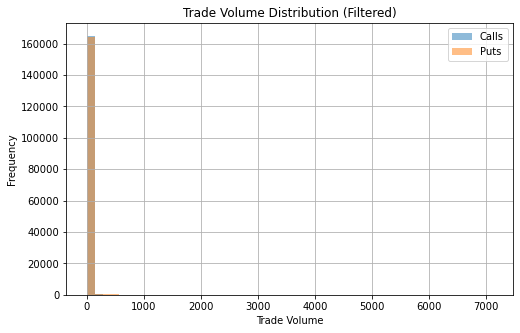

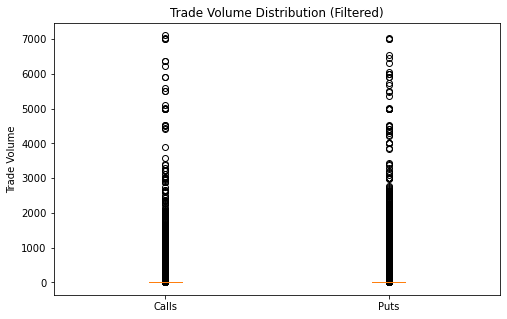

In [15]:
# Further filtering to remove extreme outlier from df_call

# Filter the data to exclude trade volumes greater than 15,000
df_call_filtered = df_call[df_call['trade_volume'] <= 8000]
df_put_filtered = df_put[df_put['trade_volume'] <= 8000]

# Plotting the histogram for Calls and Puts after filtering
plt.figure(figsize=(8,5))
df_call_filtered['trade_volume'].hist(bins=50, alpha=0.5, label='Calls')
df_put_filtered['trade_volume'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Trade Volume Distribution (Filtered)')
plt.xlabel('Trade Volume')
plt.ylabel('Frequency')
plt.show()

# Prepare the filtered data for the boxplot
data_filtered = [df_call_filtered['trade_volume'], df_put_filtered['trade_volume']]

# Plotting the boxplot after filtering
plt.figure(figsize=(8,5))
plt.boxplot(data_filtered, labels=['Calls', 'Puts'])

plt.title('Trade Volume Distribution (Filtered)')
plt.ylabel('Trade Volume')
plt.show()


### `Open Interest Distribution` <br>
The amount of trading activity for different options, showing how many contracts are being traded. <br>

### Observations
* Weaker skew in calls indicates greater participation at higher volumes, indicates confidence in upward price movements

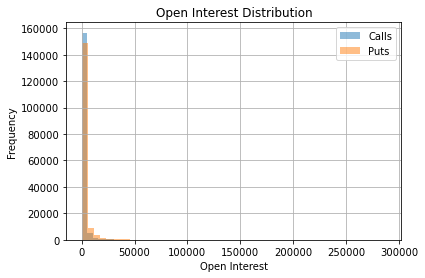

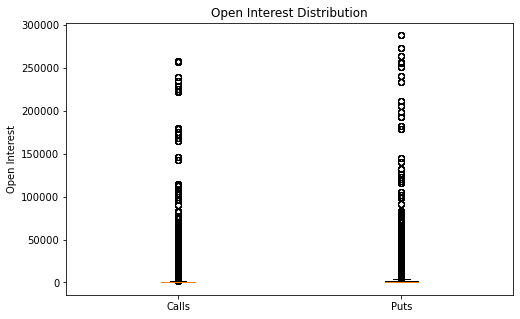

In [16]:
df_call['open_interest'].hist(bins=50, alpha=0.5, label='Calls')
df_put['open_interest'].hist(bins=50, alpha=0.5, label='Puts')
plt.legend()
plt.title('Open Interest Distribution')
plt.xlabel('Open Interest')
plt.ylabel('Frequency')
plt.show()

data = [df_call['open_interest'],df_put['open_interest']]

plt.figure(figsize=(8,5))
plt.boxplot(data, labels=['Calls','Puts'])

plt.title('Open Interest Distribution')
plt.ylabel('Open Interest')

plt.show()



# 2. Correlation Analyses

### What correlations should be disregarded?
As some variables are derived/implicitly related, some must be disregarded
* `open`, `high`, `low`, `close` represent price points throughout the day and thus likely to be very correlated, thus <i>disregard correlations between these variables</i>
* `bid`, `ask`, `bid_size`, `ask_size` are closely related and form the bid-ask spread, thus disregard correlations <i>between `bid` and `ask`, and between `bid_size` and `ask_size` </i>
* `underlying_bid`, `underlying_ask`, `active_underlying_price` are prices related to the underlying asset and thus are strongly correlated to one another, thus disregard correlations <i>between these 3 variables</i>
* `delta`, `gamma` are closely related as `gamma` represents the change of `delta`, thus <i>disregard correlation between these 2</i>
* `theta`, `vega`, `rho` measure sensitivity to time decay, volatility, and interest rate changes which can be interdependent, thus <i>disregard correlation between these 3</i>
* `implied_volatility` and `close` are strongly related because higher implied volatility increases the price of the option and a strong correlation is expected, thus <i>disregard correlation between these 2</i>

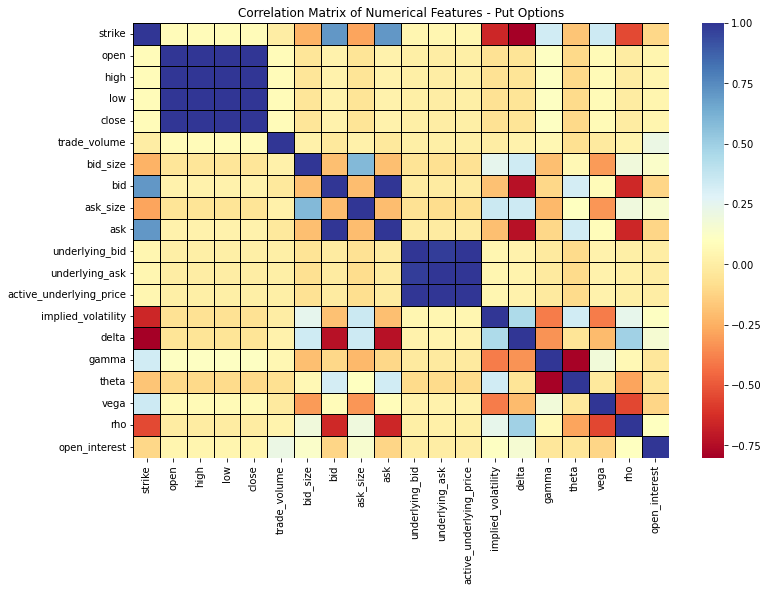

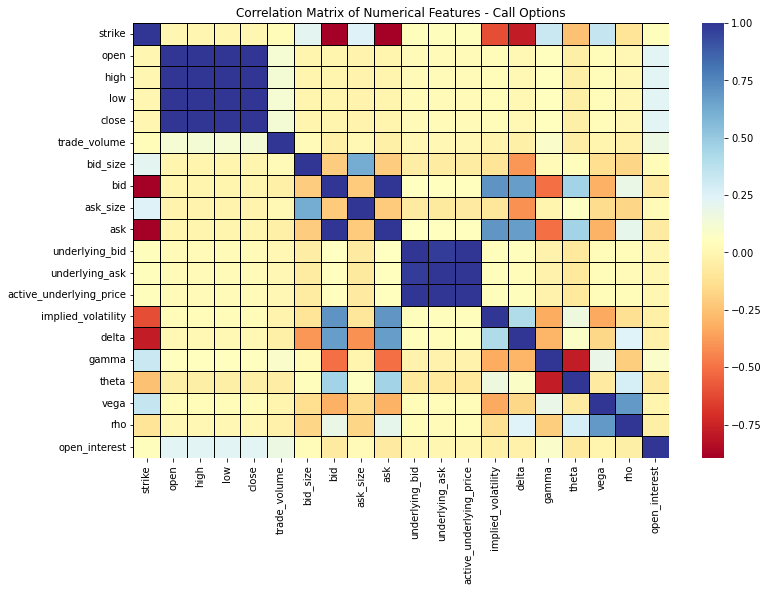

In [17]:
numeric_df_call = df_call.select_dtypes(include=['float64', 'int64'])
numeric_df_put = df_put.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix for Put Options
corr_matrix_put = numeric_df_put.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_put, cmap='RdYlBu', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features - Put Options')
plt.show()

# Correlation Matrix for Call Options
corr_matrix_call = numeric_df_call.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_call, cmap='RdYlBu', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Numerical Features - Call Options')
plt.show()


### Pairplots for Puts
For clarity and reducing clutter in pairplots, certain variables will not be shown in the pairplot analyses

Dropped variables:
* `open`, `high`, `low`. These variables represent prices of the asset recorded at different points of the day as the other variables often show similar patterns

In [18]:
numeric_df_put.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165858 entries, 0 to 165857
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   strike                   165858 non-null  float64
 1   open                     165858 non-null  float64
 2   high                     165858 non-null  float64
 3   low                      165858 non-null  float64
 4   close                    165858 non-null  float64
 5   trade_volume             165858 non-null  int64  
 6   bid_size                 165858 non-null  int64  
 7   bid                      165858 non-null  float64
 8   ask_size                 165858 non-null  int64  
 9   ask                      165858 non-null  float64
 10  underlying_bid           165858 non-null  float64
 11  underlying_ask           165858 non-null  float64
 12  active_underlying_price  165858 non-null  float64
 13  implied_volatility       165858 non-null  float64
 14  delt

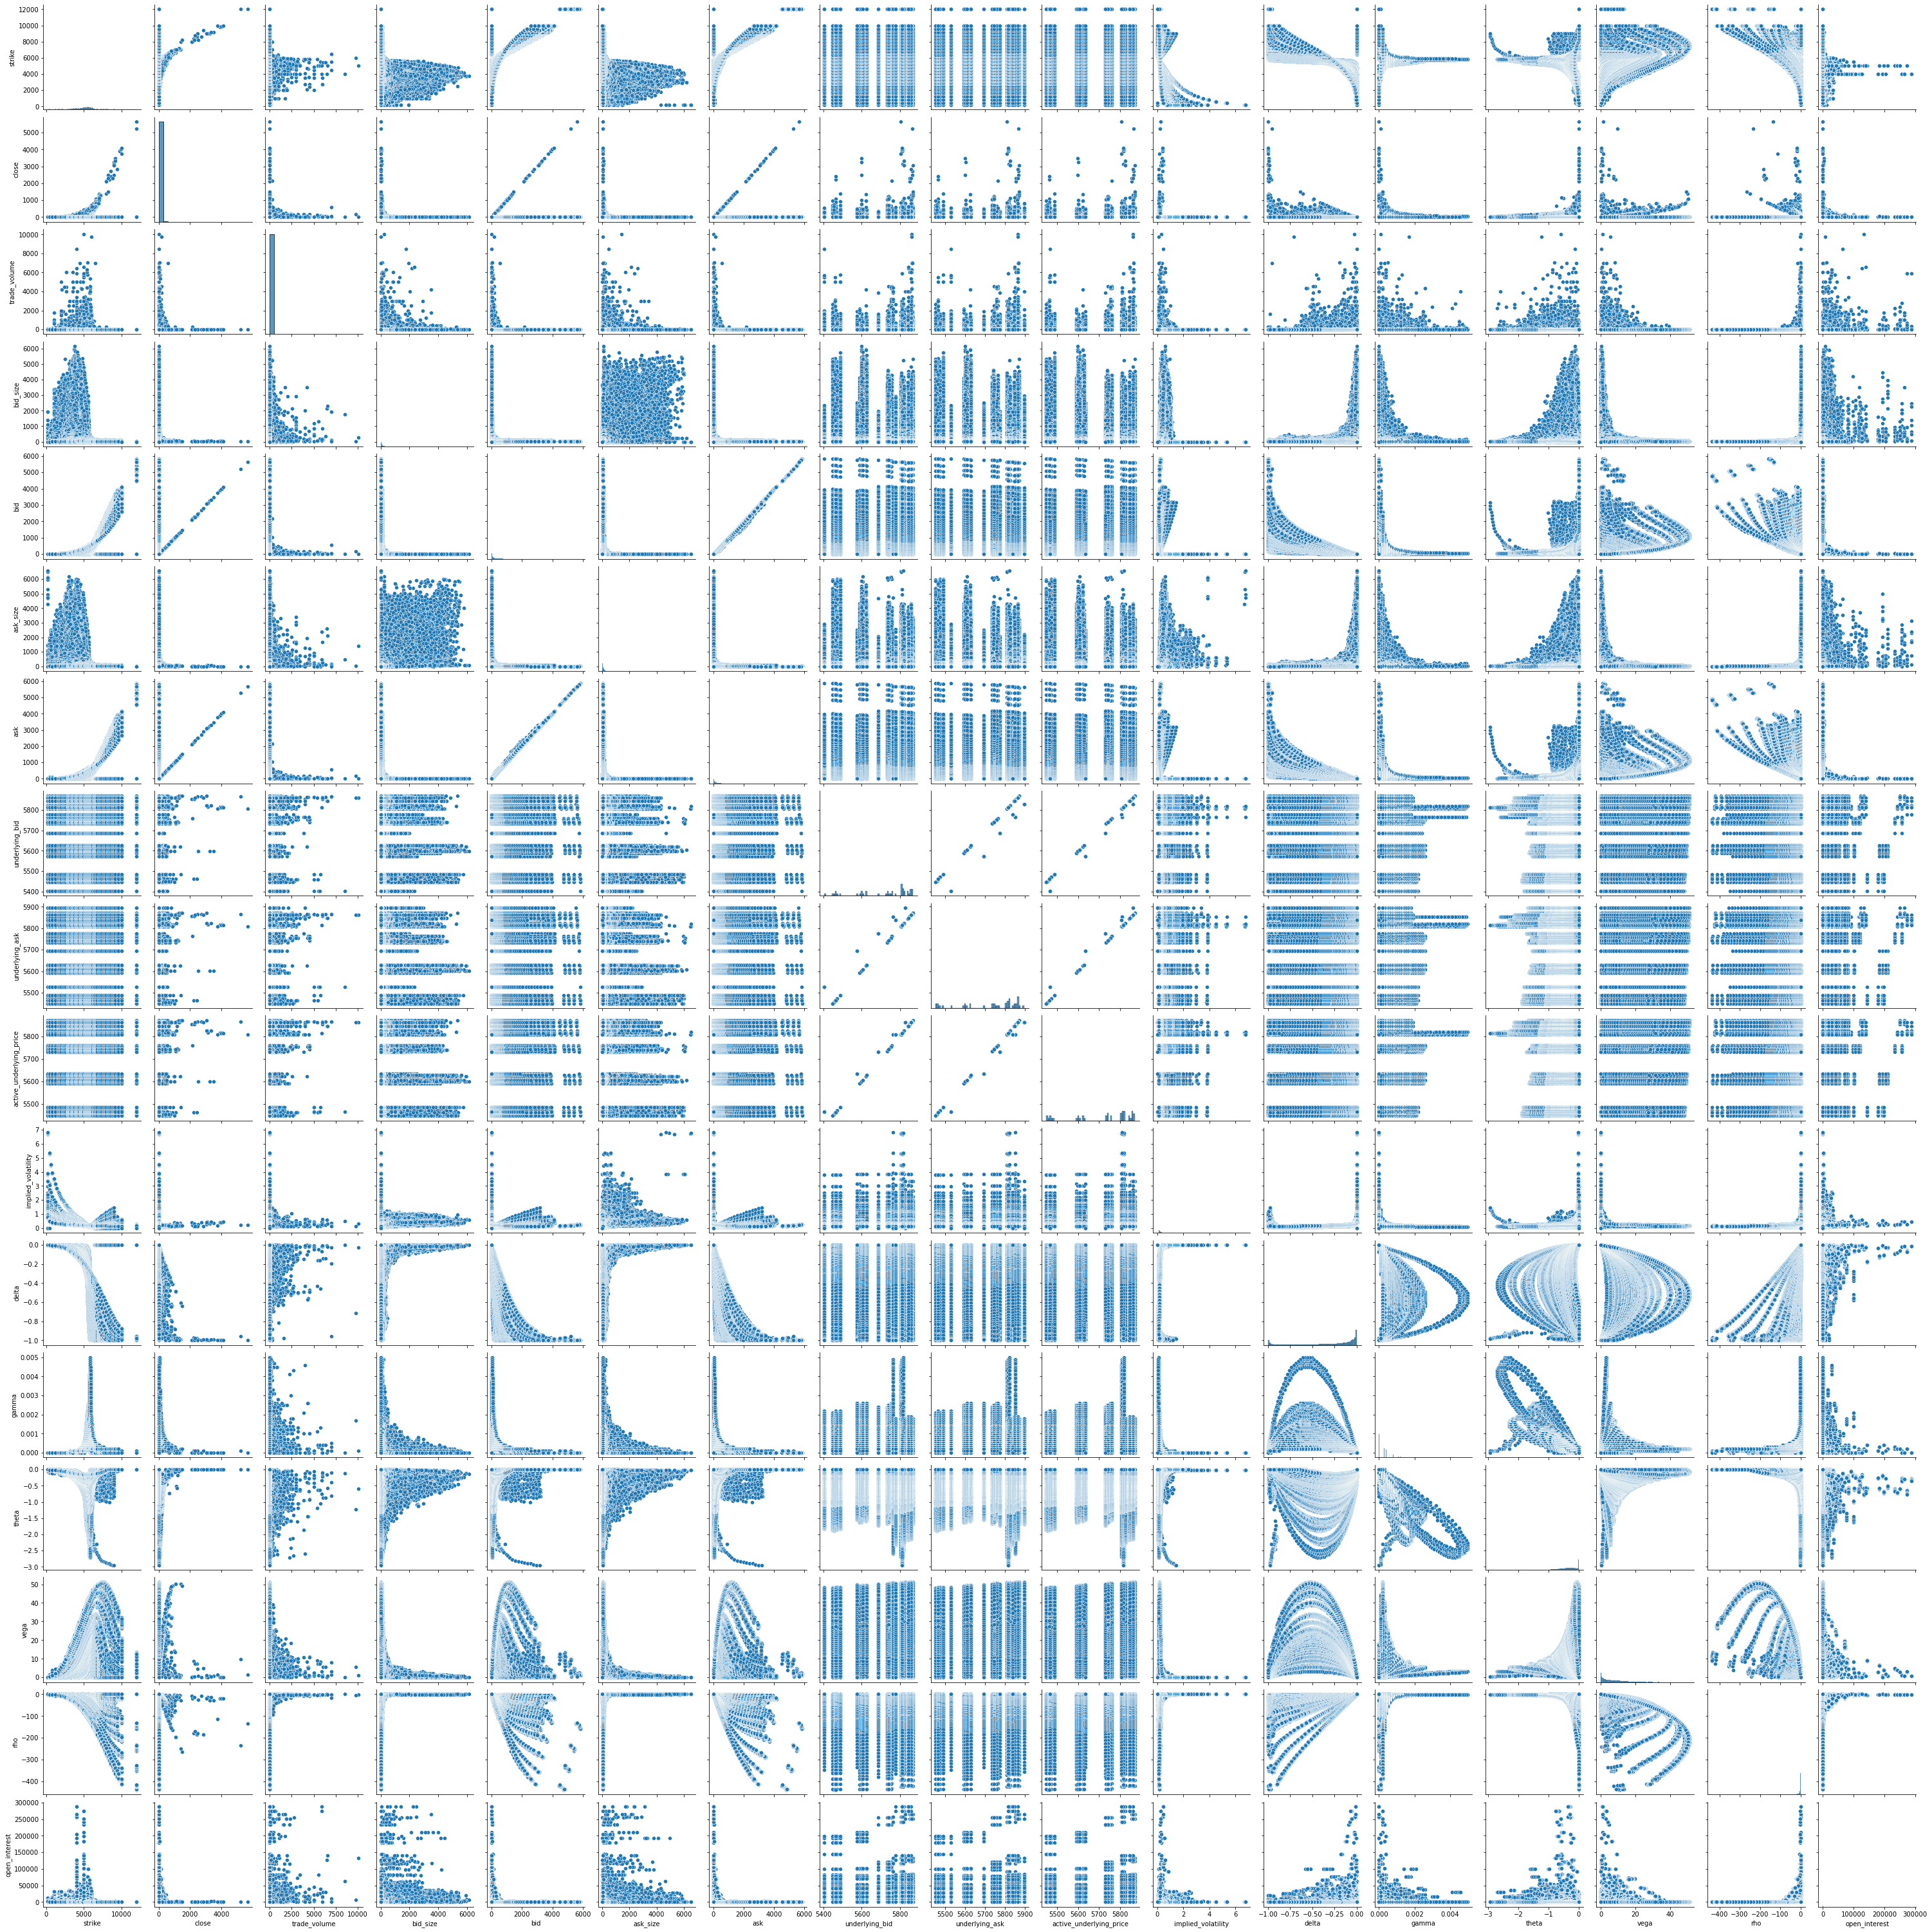

In [19]:
# Selecting a reduced set of variables for pairplot
reduced_numeric_df_put = numeric_df_put[['strike', 'close', 'trade_volume', 'bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','active_underlying_price','implied_volatility', 
                                 'delta', 'gamma', 'theta', 'vega', 'rho', 'open_interest']]

sns.pairplot(reduced_numeric_df_put)
plt.show()

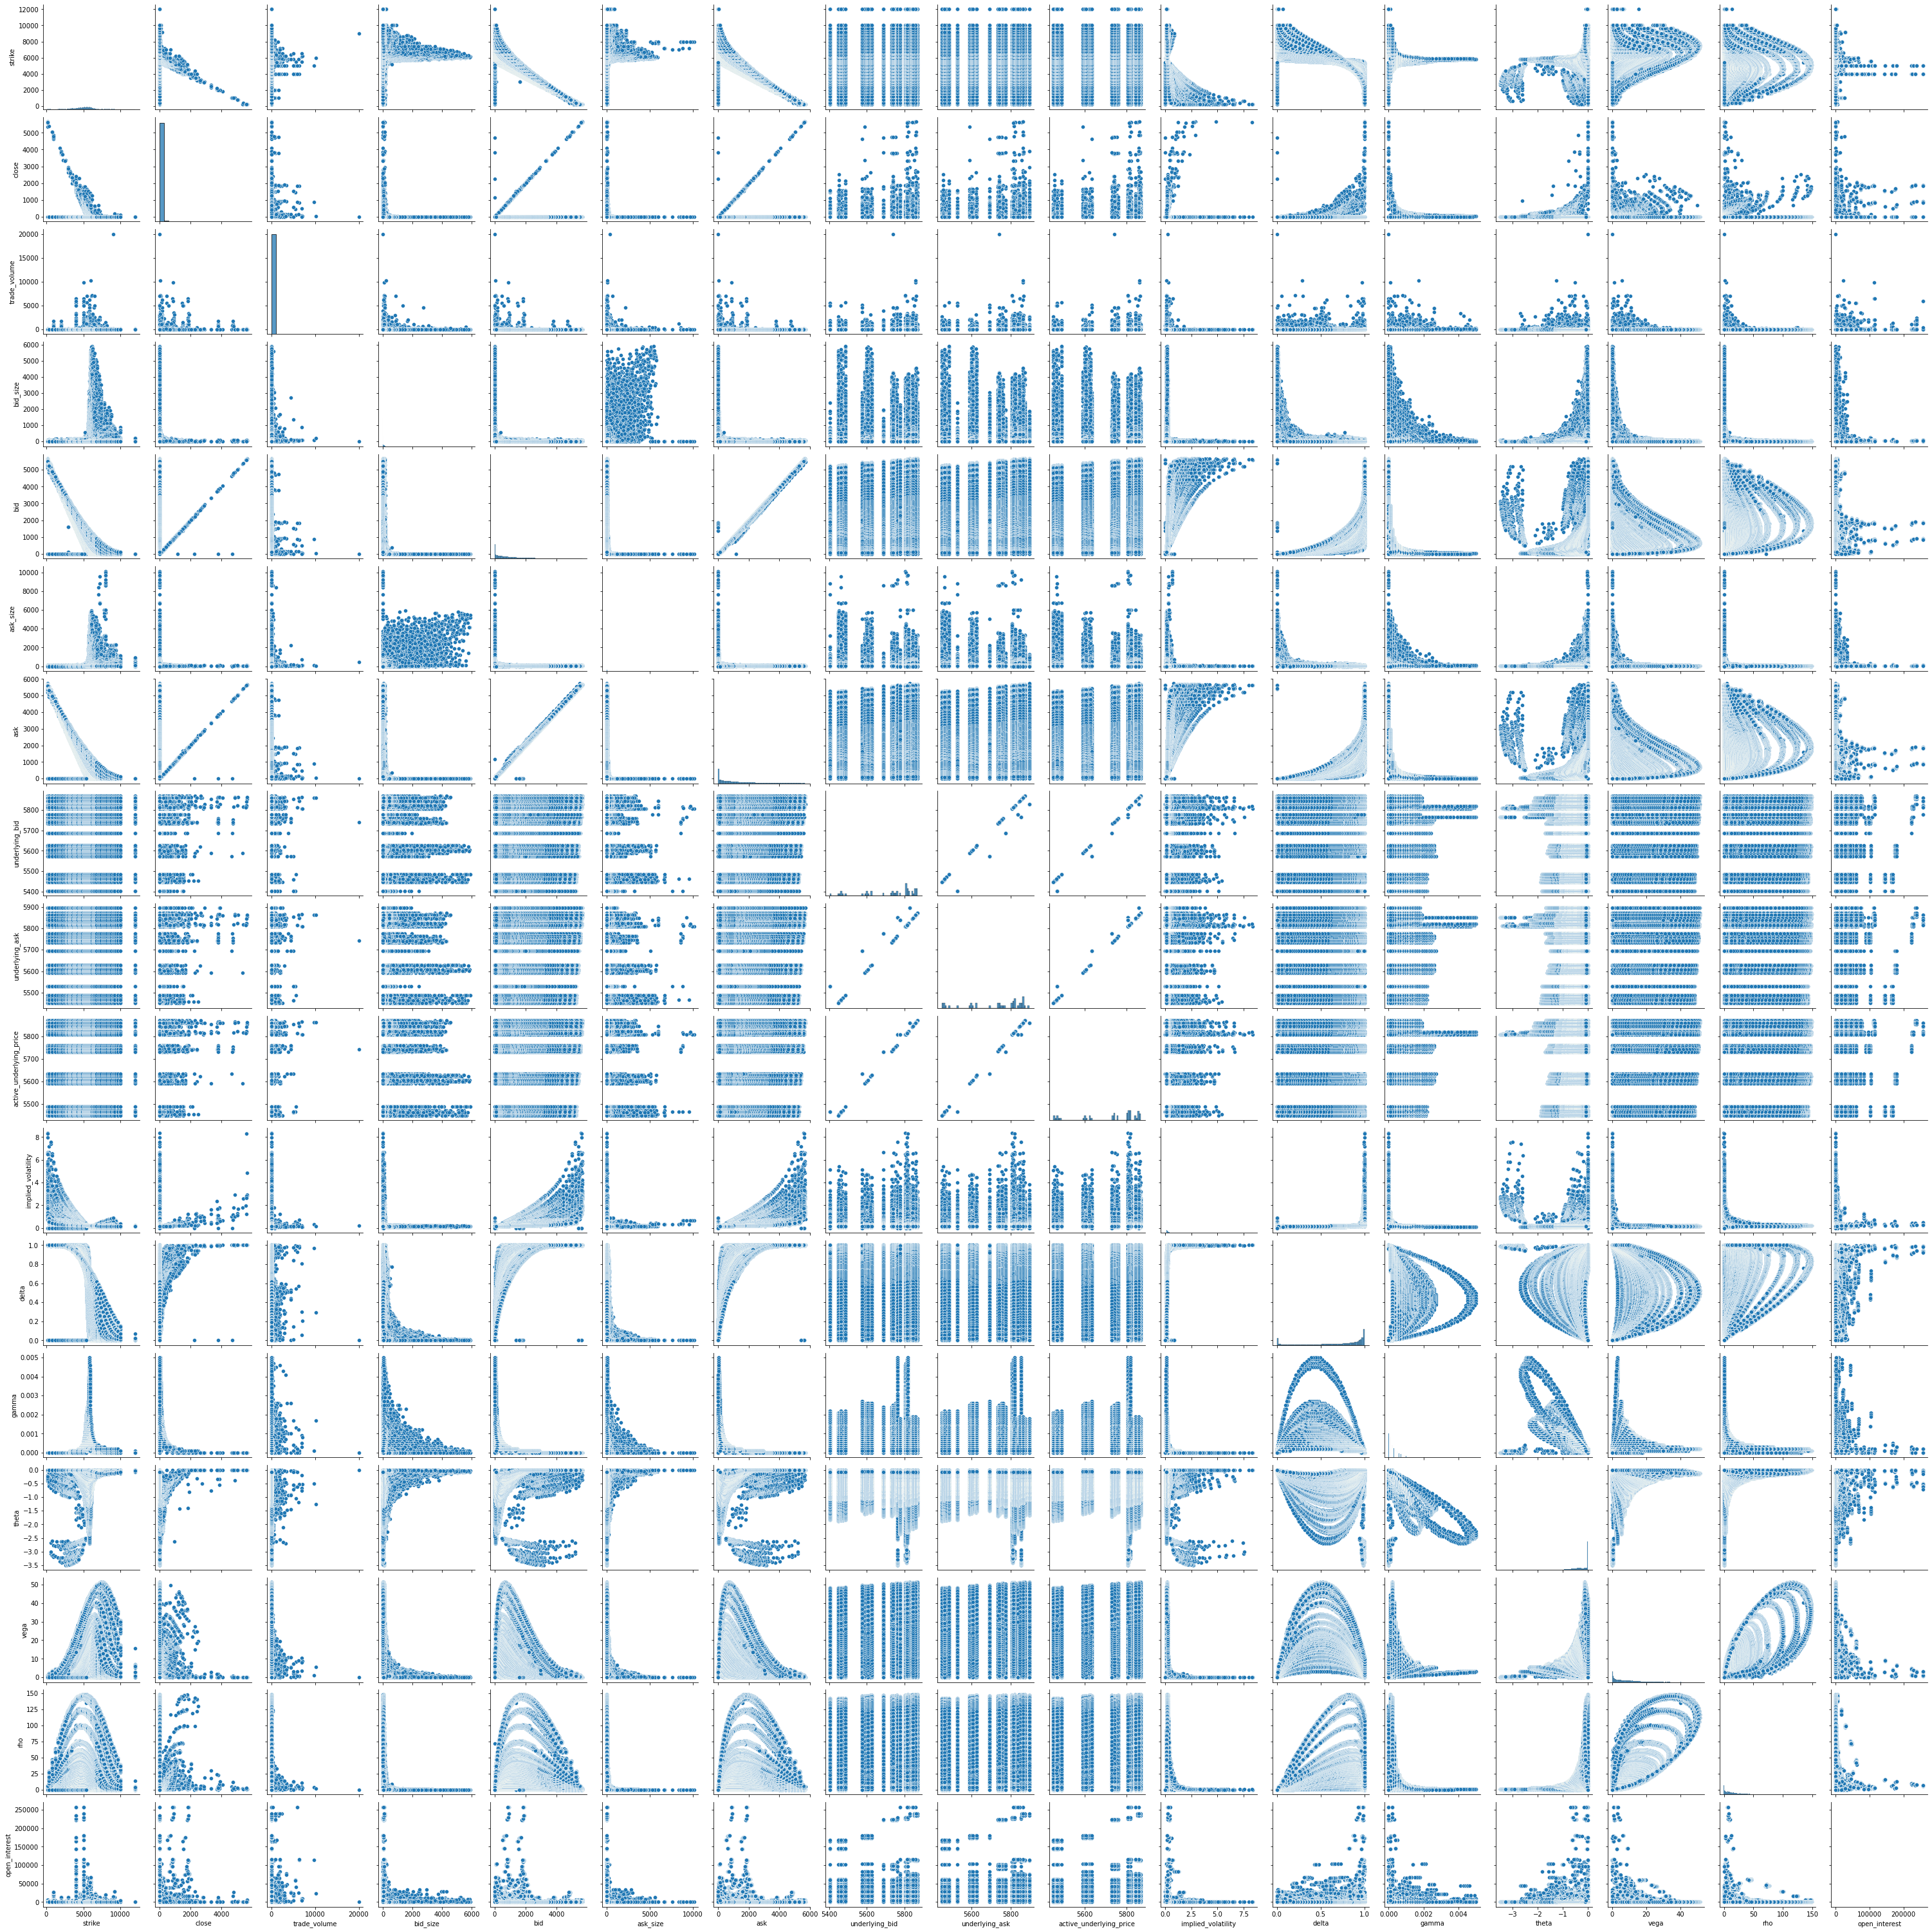

In [20]:
# Selecting a reduced set of variables for pairplot
reduced_numeric_df_call = numeric_df_call[['strike', 'close', 'trade_volume', 'bid_size','bid','ask_size','ask','underlying_bid','underlying_ask','active_underlying_price','implied_volatility', 
                                 'delta', 'gamma', 'theta', 'vega', 'rho', 'open_interest']]

sns.pairplot(reduced_numeric_df_call)
plt.show()

### Correlation Analysis Conclusions

* Minor correlations between greeks and the ask bid spread are observed
* The strike price exhibits relatively strong correlations with the ask bid spread, implied volatility, and the greeks
* Features that are positively correlated for puts may be negatively correlated for calls and vice versa

This analysis highlights the difficulty in predicting options prices

# 3. Time Series Data

In [21]:
# df_put.set_index('quote_datetime', inplace=True)
df_put.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165858 entries, 0 to 165857
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   quote_datetime           165858 non-null  datetime64[ns]
 1   expiration               165858 non-null  datetime64[ns]
 2   strike                   165858 non-null  float64       
 3   option_type              165858 non-null  object        
 4   open                     165858 non-null  float64       
 5   high                     165858 non-null  float64       
 6   low                      165858 non-null  float64       
 7   close                    165858 non-null  float64       
 8   trade_volume             165858 non-null  int64         
 9   bid_size                 165858 non-null  int64         
 10  bid                      165858 non-null  float64       
 11  ask_size                 165858 non-null  int64         
 12  ask             

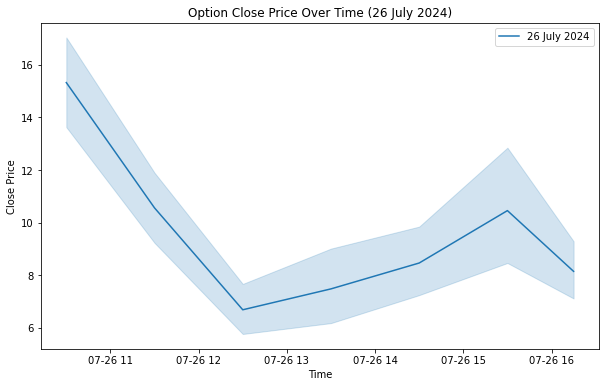

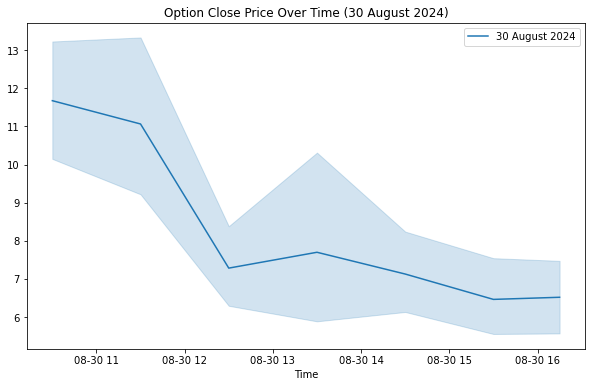

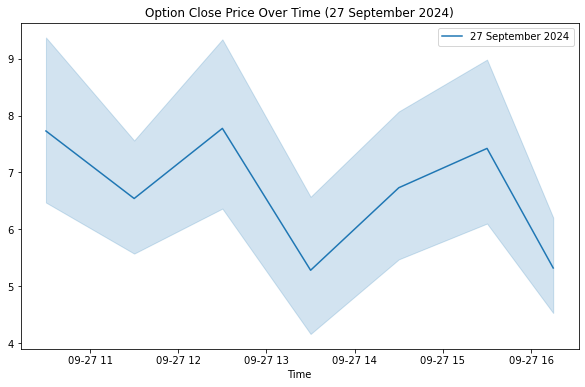

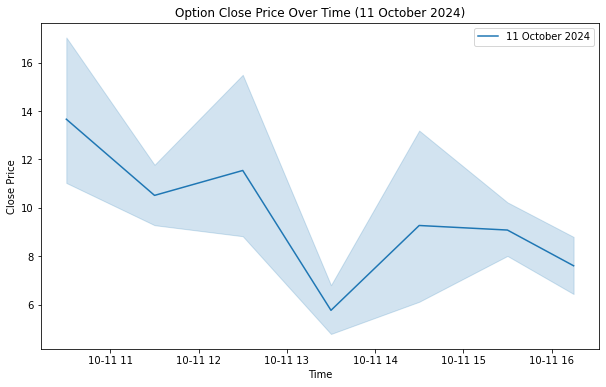

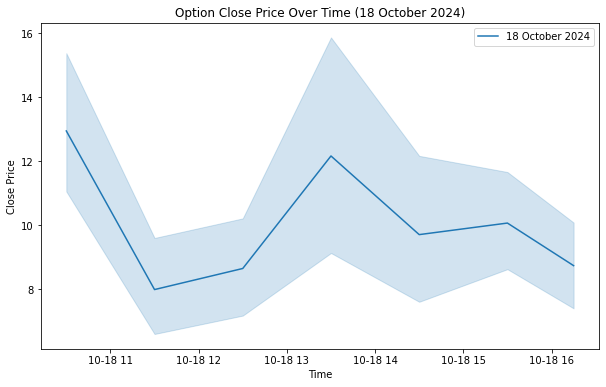

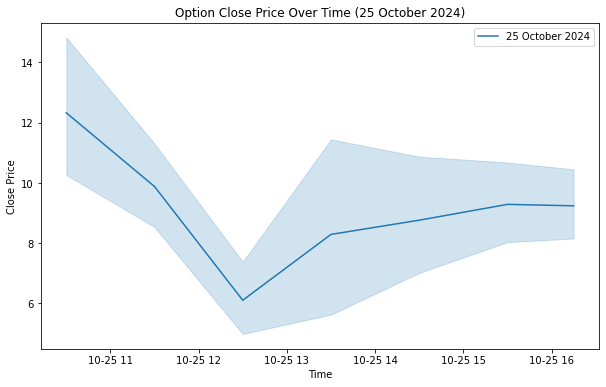

In [26]:
# Filter the data for each specific date
df_put_july = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-07-26').date()]
df_put_august = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-08-30').date()]
df_put_september = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-09-27').date()]
df_put_october_1 = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-10-11').date()]
df_put_october_2 = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-10-18').date()]
df_put_october_3 = df_put[df_put['quote_datetime'].dt.date == pd.to_datetime('2024-10-25').date()]


plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_july['quote_datetime'], y=df_put_july['close'], label='26 July 2024')
plt.title('Option Close Price Over Time (26 July 2024)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_august['quote_datetime'], y=df_put_august['close'], label='30 August 2024')
plt.title('Option Close Price Over Time (30 August 2024)')
plt.xlabel('Time')
# plt.ylabel('Close Price')
plt.ylabel('')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_september['quote_datetime'], y=df_put_september['close'], label='27 September 2024')
plt.title('Option Close Price Over Time (27 September 2024)')
plt.xlabel('Time')
# plt.ylabel('Close Price')
plt.ylabel('')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_october_1['quote_datetime'], y=df_put_october_1['close'], label='11 October 2024')
plt.title('Option Close Price Over Time (11 October 2024)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_october_2['quote_datetime'], y=df_put_october_2['close'], label='18 October 2024')
plt.title('Option Close Price Over Time (18 October 2024)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x=df_put_october_3['quote_datetime'], y=df_put_october_3['close'], label='25 October 2024')
plt.title('Option Close Price Over Time (25 October 2024)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# 4. Greeks

In [23]:
greeks = ['delta', 'gamma', 'theta', 'vega', 'rho']

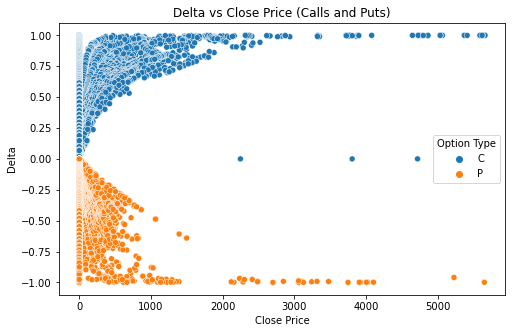

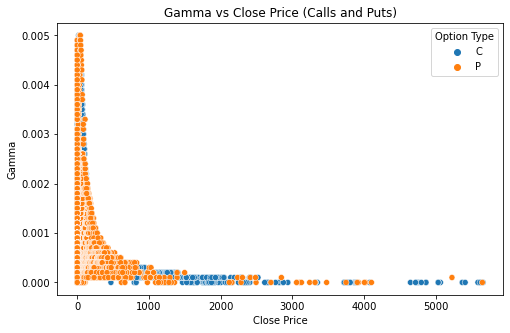

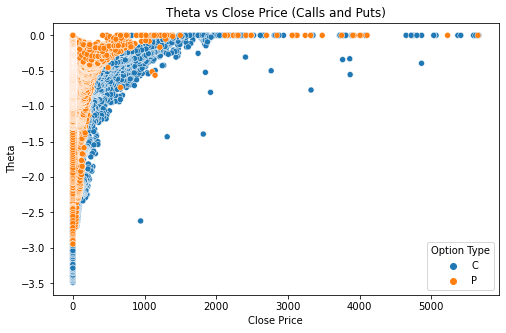

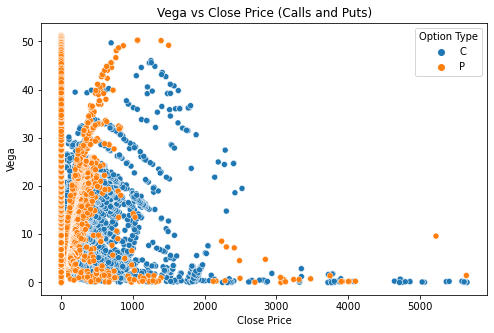

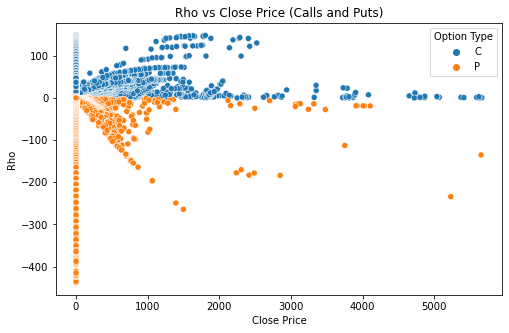

In [24]:
# Combine df_call and df_put into one dataframe
df_combined = pd.concat([df_call, df_put])

# Scatter plots of Greeks vs Strike and Implied Volatility for both calls and puts
for greek in greeks:
    plt.figure(figsize=(8, 5))
    
    # Plot combined data with hue for option_type
    sns.scatterplot(x='close', y=greek, hue='option_type', data=df_combined)
    
    plt.title(f'{greek.capitalize()} vs Close Price (Calls and Puts)')
    plt.xlabel('Close Price')
    plt.ylabel(greek.capitalize())
    plt.legend(title='Option Type')
    plt.show()